In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('human.csv', encoding='cp949')
data.head(4).T

,0,1,2,3
아이디,H20001,H20002,H20003,H20004
나이,39,50,38,53
노동 계급,State-gov,Self-emp-not-inc,Private,Private
fnlwgt,77516,83311,215646,234721
학력,Bachelors,Bachelors,HS-grad,11th
교육 수,13,13,9,7
혼인 상태,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse
직업,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners
관계,Not-in-family,Husband,Not-in-family,Husband
인종,White,White,White,Black


In [3]:
d = data.copy()
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   아이디     32561 non-null  object
 1   나이      32561 non-null  int64 
 2   노동 계급   30725 non-null  object
 3   fnlwgt  32561 non-null  int64 
 4   학력      32561 non-null  object
 5   교육 수    32561 non-null  int64 
 6   혼인 상태   32561 non-null  object
 7   직업      30718 non-null  object
 8   관계      32561 non-null  object
 9   인종      32561 non-null  object
 10  성별      32561 non-null  object
 11  자본 이득   32561 non-null  int64 
 12  자본 손실   32561 non-null  int64 
 13  주당 시간   32561 non-null  int64 
 14  모국      31978 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
d.isnull().sum()

아이디          0
나이           0
노동 계급     1836
fnlwgt       0
학력           0
교육 수         0
혼인 상태        0
직업        1843
관계           0
인종           0
성별           0
자본 이득        0
자본 손실        0
주당 시간        0
모국         583
dtype: int64

In [5]:
d.describe()

,나이,fnlwgt,교육 수,자본 이득,자본 손실,주당 시간
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
d.describe(include=[object])

,아이디,노동 계급,학력,혼인 상태,직업,관계,인종,성별,모국
count,32561,30725,32561,32561,30718,32561,32561,32561,31978
unique,32561,8,16,7,14,6,5,2,41
top,H24353,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,1,22696,10501,14976,4140,13193,27816,21790,29170


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'

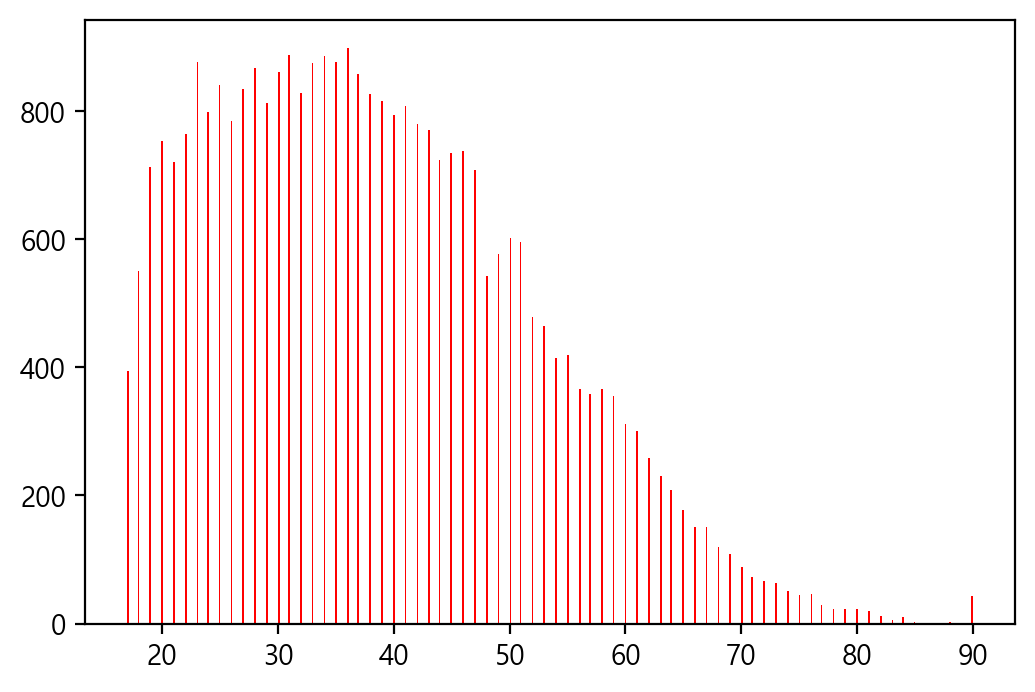

In [8]:
plt.figure(dpi = 200)
plt.hist(d['나이'], bins = 500, color = 'r')
plt.show()

In [9]:
gender_vals = d['성별'].value_counts().values
gender_label = d['성별'].value_counts().index

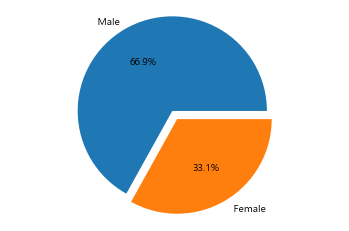

In [10]:
plt.pie(gender_vals, labels=gender_label, autopct='%0.1f%%', explode = (0, 0.1))
plt.axis('equal')
plt.show()

In [11]:
d['성별'].value_counts()

 Male      21790
 Female    10771
Name: 성별, dtype: int64

In [12]:
직업_label = d['직업'].value_counts(ascending=False).index
직업_vals = d['직업'].value_counts(ascending=False).values

In [13]:
직업_label

Index([' Prof-specialty', ' Craft-repair', ' Exec-managerial', ' Adm-clerical',
       ' Sales', ' Other-service', ' Machine-op-inspct', ' Transport-moving',
       ' Handlers-cleaners', ' Farming-fishing', ' Tech-support',
       ' Protective-serv', ' Priv-house-serv', ' Armed-Forces'],
      dtype='object')

In [14]:
직업_vals

array([4140, 4099, 4066, 3770, 3650, 3295, 2002, 1597, 1370,  994,  928,
        649,  149,    9], dtype=int64)

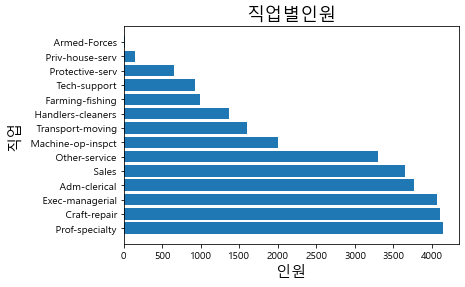

In [15]:
plt.barh(직업_label, 직업_vals)
plt.title('직업별인원', fontsize=18)
plt.ylabel('직업', fontsize=15)
plt.xlabel('인원', fontsize=15)
plt.yticks(직업_label, fontsize=10, rotation=0)
plt.show()

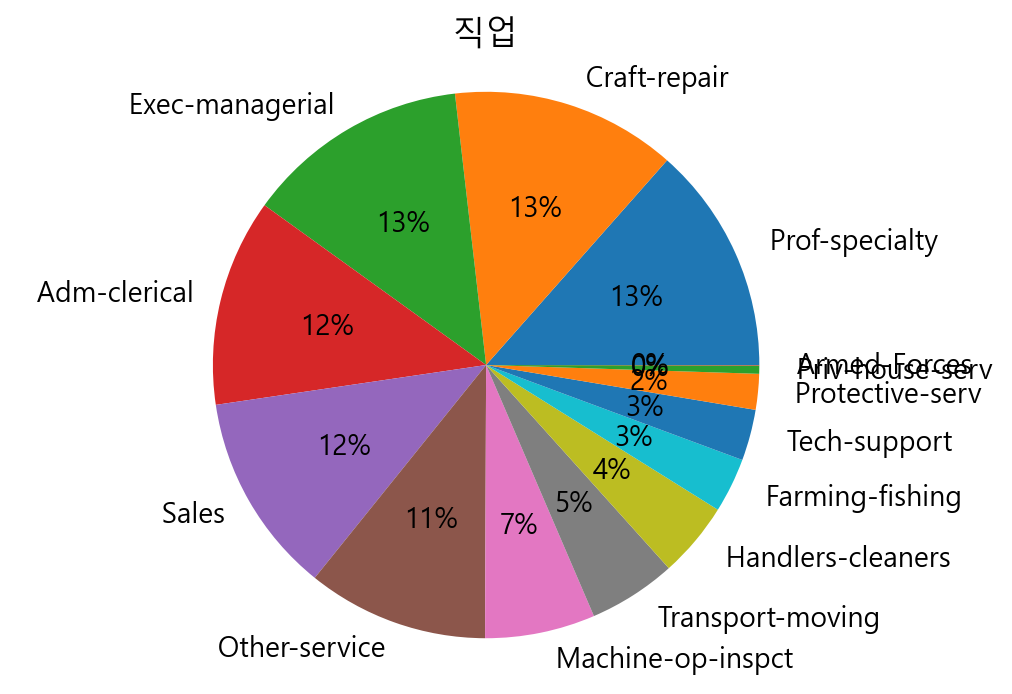

In [16]:
plt.figure(dpi = 200)
plt.title('직업')
plt.pie(직업_vals, labels=직업_label, autopct = '%1.f%%')
plt.axis('equal')
plt.show()

C:\Users\15\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\15\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


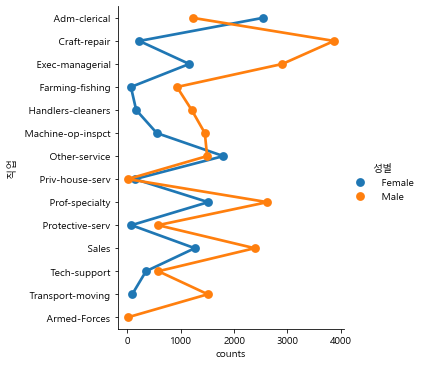

In [17]:
gender_catcnt = d.groupby(['성별', '직업'])['아이디'].agg('count').to_frame()
df_catecnt = gender_catcnt.reset_index()
df_catecnt.columns = ['성별', '직업', 'counts']

sns.factorplot('counts', '직업', hue='성별', data=df_catecnt)

In [18]:
d['모국'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

In [19]:
d['인종'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: 인종, dtype: int64

In [20]:
d['직업'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: 직업, dtype: int64

In [21]:
d['학력'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: 학력, dtype: int64

In [22]:
d['노동 계급'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: 노동 계급, dtype: int64

In [23]:
d['혼인 상태'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: 혼인 상태, dtype: int64

In [24]:
d['partner'] = np.where((d['혼인 상태'].str.len() > 14), 'couple', 'single')
d.tail()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,partner
32556,H52557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,couple
32557,H52558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,couple
32558,H52559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,single
32559,H52560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,single
32560,H52561,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,couple


In [25]:
d['marital'] = np.where(((d['관계'] == ' Husband') | (d['관계'] == ' Own-child') | (d['관계'] == ' Wife')), 'married', 'unmarried')
d.tail()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,partner,marital
32556,H52557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,couple,married
32557,H52558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,couple,married
32558,H52559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,single,unmarried
32559,H52560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,single,married
32560,H52561,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,couple,married


In [26]:
d['marital'].value_counts()

married      19829
unmarried    12732
Name: marital, dtype: int64

In [27]:
d['주당 시간'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: 주당 시간, Length: 94, dtype: int64

In [28]:
d['노동 강도'] = np.where((d['주당 시간'] >= 40 ), 'hard-worker', 'non-hard-worker')
d.tail()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,partner,marital,노동 강도
32556,H52557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,couple,married,non-hard-worker
32557,H52558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,couple,married,hard-worker
32558,H52559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,single,unmarried,hard-worker
32559,H52560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,single,married,non-hard-worker
32560,H52561,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,couple,married,hard-worker


In [29]:
d.loc[d['주당 시간'] <= 25, '노동 시간'] = 'part'
d.loc[(d['주당 시간'] > 25) & (d['주당 시간'] <= 40), '노동 시간'] = 'full'
d.loc[(d['주당 시간'] > 40) & (d['주당 시간'] <= 60), '노동 시간'] = 'over'
d.loc[d['주당 시간'] > 60, '노동 시간'] = 'too-much'
d.tail()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,partner,marital,노동 강도,노동 시간
32556,H52557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,couple,married,non-hard-worker,full
32557,H52558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,couple,married,hard-worker,full
32558,H52559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,single,unmarried,hard-worker,full
32559,H52560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,single,married,non-hard-worker,part
32560,H52561,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,couple,married,hard-worker,full


In [30]:
d.loc[d['나이'] <= 25, '연령대'] = 'young'
d.loc[(d['나이'] > 25) & (d['나이'] <= 45), '연령대'] = 'middle'
d.loc[(d['나이'] > 45) & (d['나이'] <= 65), '연령대'] = 'senior'
d.loc[d['나이'] > 65, '연령대'] = 'old'
d.tail()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,partner,marital,노동 강도,노동 시간,연령대
32556,H52557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,couple,married,non-hard-worker,full,middle
32557,H52558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,couple,married,hard-worker,full,middle
32558,H52559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,single,unmarried,hard-worker,full,senior
32559,H52560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,single,married,non-hard-worker,part,young
32560,H52561,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,couple,married,hard-worker,full,senior


In [31]:
d.loc[(d['학력'] == ' 11th') | (d['학력'] == ' 10th') |
        (d['학력'] == ' 7th-8th') | (d['학력'] == ' 9th') |
        (d['학력'] == ' 12th') | (d['학력'] == ' 5th-6th') |
        (d['학력'] == ' 1st-4th') | (d['학력'] == ' Preschool'), '학군'] = 'low'

In [32]:
d.loc[(d['학력'] == ' Assoc-voc') | (d['학력'] == ' Assoc-acdm') |
        (d['학력'] == ' Prof-school') | (d['학력'] == ' HS-grad') |
        (d['학력'] == ' Some-college'), '학군']= 'ave'

In [33]:
d.loc[(d['학력'] == ' Bachelors') | (d['학력'] == ' Masters') |
        (d['학력'] == ' Doctorate'), '학군']= 'high'
d.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,...,자본 이득,자본 손실,주당 시간,모국,partner,marital,노동 강도,노동 시간,연령대,학군
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,...,2174,0,40,United-States,single,unmarried,hard-worker,full,middle,high
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,...,0,0,13,United-States,couple,married,non-hard-worker,part,senior,high
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,...,0,0,40,United-States,single,unmarried,hard-worker,full,middle,ave
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,...,0,0,40,United-States,couple,married,hard-worker,full,senior,low
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,...,0,0,40,Cuba,couple,married,hard-worker,full,middle,high


In [34]:
d['노동 강도'].value_counts()

hard-worker        24798
non-hard-worker     7763
Name: 노동 강도, dtype: int64

In [35]:
d['관계'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: 관계, dtype: int64

In [36]:
d['직업'] = d['직업'].fillna('Unknown')

In [37]:
d_관계 = pd.get_dummies(d['관계'])
d_관계.head()

,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [38]:
dd = pd.concat([d, d_관계], axis=1)
dd.head().T

,0,1,2,3,4
아이디,H20001,H20002,H20003,H20004,H20005
나이,39,50,38,53,28
노동 계급,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
학력,Bachelors,Bachelors,HS-grad,11th,Bachelors
교육 수,13,13,9,7,13
혼인 상태,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
직업,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
관계,Not-in-family,Husband,Not-in-family,Husband,Wife
인종,White,White,White,Black,Black


In [39]:
d_인종 = pd.get_dummies(d['인종'])
d_인종.head()

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0


In [40]:
dff = pd.concat([dd, d_인종], axis=1)
dff.head().T

,0,1,2,3,4
아이디,H20001,H20002,H20003,H20004,H20005
나이,39,50,38,53,28
노동 계급,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
학력,Bachelors,Bachelors,HS-grad,11th,Bachelors
교육 수,13,13,9,7,13
혼인 상태,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
직업,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
관계,Not-in-family,Husband,Not-in-family,Husband,Wife
인종,White,White,White,Black,Black


In [41]:
d_직업 = pd.get_dummies(d['직업'])
df = pd.concat([dff, d_직업], axis=1)
df.head().T

,0,1,2,3,4
아이디,H20001,H20002,H20003,H20004,H20005
나이,39,50,38,53,28
노동 계급,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
학력,Bachelors,Bachelors,HS-grad,11th,Bachelors
교육 수,13,13,9,7,13
혼인 상태,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
직업,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
관계,Not-in-family,Husband,Not-in-family,Husband,Wife
인종,White,White,White,Black,Black


In [42]:
df.shape

(32561, 47)

In [43]:
df.isnull().sum()

아이디                       0
나이                        0
노동 계급                  1836
fnlwgt                    0
학력                        0
교육 수                      0
혼인 상태                     0
직업                        0
관계                        0
인종                        0
성별                        0
자본 이득                     0
자본 손실                     0
주당 시간                     0
모국                      583
partner                   0
marital                   0
노동 강도                     0
노동 시간                     0
연령대                       0
학군                        0
 Husband                  0
 Not-in-family            0
 Other-relative           0
 Own-child                0
 Unmarried                0
 Wife                     0
 Amer-Indian-Eskimo       0
 Asian-Pac-Islander       0
 Black                    0
 Other                    0
 White                    0
 Adm-clerical             0
 Armed-Forces             0
 Craft-repair             0
 Exec-managerial    

In [44]:
df['노동 계급'] = df['노동 계급'].fillna('Unknown')

In [45]:
con = ['모국']

In [46]:
from sklearn.impute import SimpleImputer

In [47]:
imputer = SimpleImputer(strategy="most_frequent")
df[con] = imputer.fit_transform(df[con])
df[con].head()

,모국
0,United-States
1,United-States
2,United-States
3,United-States
4,Cuba


In [48]:
df.isnull().sum()

아이디                    0
나이                     0
노동 계급                  0
fnlwgt                 0
학력                     0
교육 수                   0
혼인 상태                  0
직업                     0
관계                     0
인종                     0
성별                     0
자본 이득                  0
자본 손실                  0
주당 시간                  0
모국                     0
partner                0
marital                0
노동 강도                  0
노동 시간                  0
연령대                    0
학군                     0
 Husband               0
 Not-in-family         0
 Other-relative        0
 Own-child             0
 Unmarried             0
 Wife                  0
 Amer-Indian-Eskimo    0
 Asian-Pac-Islander    0
 Black                 0
 Other                 0
 White                 0
 Adm-clerical          0
 Armed-Forces          0
 Craft-repair          0
 Exec-managerial       0
 Farming-fishing       0
 Handlers-cleaners     0
 Machine-op-inspct     0
 Other-service         0


In [49]:
df.dtypes

아이디                    object
나이                      int64
노동 계급                  object
fnlwgt                  int64
학력                     object
교육 수                    int64
혼인 상태                  object
직업                     object
관계                     object
인종                     object
성별                     object
자본 이득                   int64
자본 손실                   int64
주당 시간                   int64
모국                     object
partner                object
marital                object
노동 강도                  object
노동 시간                  object
연령대                    object
학군                     object
 Husband                uint8
 Not-in-family          uint8
 Other-relative         uint8
 Own-child              uint8
 Unmarried              uint8
 Wife                   uint8
 Amer-Indian-Eskimo     uint8
 Asian-Pac-Islander     uint8
 Black                  uint8
 Other                  uint8
 White                  uint8
 Adm-clerical           uint8
 Armed-For

In [50]:
cat = ['노동 계급', '학력', '혼인 상태', '직업', '관계', '인종', '성별', '모국', 'marital', '노동 강도', 'partner', '노동 시간', '연령대', '학군']
obj = ['노동 계급', '학력', '혼인 상태', '직업', '관계', '인종', '성별', '모국', 'marital', '노동 강도', 'partner', '노동 시간', '연령대', '학군']

In [51]:
df[obj] = df[obj].apply(lambda x: x.astype('category').cat.codes)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   아이디                  32561 non-null  object
 1   나이                   32561 non-null  int64 
 2   노동 계급                32561 non-null  int8  
 3   fnlwgt               32561 non-null  int64 
 4   학력                   32561 non-null  int8  
 5   교육 수                 32561 non-null  int64 
 6   혼인 상태                32561 non-null  int8  
 7   직업                   32561 non-null  int8  
 8   관계                   32561 non-null  int8  
 9   인종                   32561 non-null  int8  
 10  성별                   32561 non-null  int8  
 11  자본 이득                32561 non-null  int64 
 12  자본 손실                32561 non-null  int64 
 13  주당 시간                32561 non-null  int64 
 14  모국                   32561 non-null  int8  
 15  partner              32561 non-null  int8  
 16  mari

In [53]:
corr = df.corr()
abs(corr.성별).sort_values(ascending=False)

성별                     1.000000
관계                     0.582454
 Husband               0.580135
partner                0.421465
marital                0.367496
 Unmarried             0.321273
 Wife                  0.319311
 Adm-clerical          0.263148
노동 강도                  0.235759
주당 시간                  0.229309
 Craft-repair          0.223128
 Not-in-family         0.168879
 Other-service         0.153677
 Transport-moving      0.132468
혼인 상태                  0.129314
 Black                 0.115604
 White                 0.103486
 Own-child             0.102369
 Farming-fishing       0.100097
 Handlers-cleaners     0.094026
나이                     0.088832
 Priv-house-serv       0.088699
인종                     0.087204
연령대                    0.073516
Unknown                0.065350
 Protective-serv       0.064770
자본 이득                  0.048480
자본 손실                  0.045567
 Other-relative        0.040282
학군                     0.037316
 Exec-managerial       0.036729
 Machine

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(corr.values, i) for i in range(corr.shape[1])]
vif["features"] = corr.columns
vif

,VIF Factor,features
0,6.308862e+00,나이
1,3.443359e+01,노동 계급
2,1.524323e+00,fnlwgt
3,2.422514e+01,학력
4,6.956473e+00,교육 수
5,4.806349e+00,혼인 상태
6,9.659698e+06,직업
7,8.543069e+05,관계
8,9.037777e+06,인종
9,6.698471e+01,성별


In [55]:
dfX = df.drop(['아이디','성별'], axis=1) 

In [56]:
dfy = df['성별']

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#model = KNeighborsClassifier()
model = LogisticRegression()
#model = DecisionTreeClassifier()

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [59]:
# !pip install imblearn

In [60]:
from imblearn.combine import *
from imblearn.combine import *

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [62]:
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [63]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [64]:
tree3 = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)

tree3.fit(X_train, y_train)
y_pred3 = tree3.predict(X_test)

print(classification_report(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76      2701
           1       0.89      0.87      0.88      5440

    accuracy                           0.84      8141
   macro avg       0.82      0.82      0.82      8141
weighted avg       0.84      0.84      0.84      8141

0.8388404372927158


In [65]:
from imblearn.under_sampling import TomekLinks

In [66]:
XX, yy = TomekLinks().fit_sample(X_train, y_train)
tree0 = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
tree0.fit(XX, yy)
y_pred0 = tree0.predict(X_test)

print(classification_report(y_test, y_pred0))
print(accuracy_score(y_test, y_pred0))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      2701
           1       0.90      0.85      0.87      5440

    accuracy                           0.84      8141
   macro avg       0.81      0.83      0.82      8141
weighted avg       0.84      0.84      0.84      8141

0.8369979118044466


In [67]:
from imblearn.combine import SMOTETomek

In [68]:
# Tomek links: a under-sampling class method
XX, yy = SMOTETomek().fit_sample(X_train, y_train)
tree0 = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
tree0.fit(XX, yy)
y_pred0 = tree0.predict(X_test)

print(classification_report(y_test, y_pred0))
print(accuracy_score(y_test, y_pred0))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      2701
           1       0.89      0.86      0.87      5440

    accuracy                           0.83      8141
   macro avg       0.81      0.82      0.81      8141
weighted avg       0.84      0.83      0.83      8141

0.8329443557302543


In [69]:
from sklearn.dummy import DummyClassifier
print(y_test.value_counts())
DummyClassifier(strategy='most_frequent').fit(X_train, y_train).score(X_test, y_test)

1    5440
0    2701
Name: 성별, dtype: int64


0.6682225770789829

In [70]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [71]:
import xgboost as xgb
from xgboost import plot_importance
#import pan
import numpy as np

In [72]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [73]:
dtrain

In [74]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [75]:
wlist = [(dtrain, 'train'),(dtest, 'eval')]
# 하이퍼 파라미터와 early stoppinig 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[16:05:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.64452	eval-logloss:0.64462
[1]	train-logloss:0.60461	eval-logloss:0.60478
[2]	train-logloss:0.57114	eval-logloss:0.57134
[3]	train-logloss:0.54291	eval-logloss:0.54307
[4]	train-logloss:0.51866	eval-logloss:0.51892
[5]	train-logloss:0.49785	eval-logloss:0.49812
[6]	train-logloss:0.47973	eval-logloss:0.47998
[7]	train-logloss:0.46386	eval-logloss:0.46424
[8]	train-logloss:0.44986	eval-logloss:0.45036
[9]	train-logloss:0.43729	eval-logloss:0.43801
[10]	train-logloss:0.42590	eval-logloss:0.42688
[11]	train-logloss:0.41585	eval-logloss:0.41670
[12]	train-logloss:0.40672	eval-logloss:0

[162]	train-logloss:0.28228	eval-logloss:0.29466
[163]	train-logloss:0.28224	eval-logloss:0.29463
[164]	train-logloss:0.28210	eval-logloss:0.29473
[165]	train-logloss:0.28197	eval-logloss:0.29466
[166]	train-logloss:0.28193	eval-logloss:0.29468
[167]	train-logloss:0.28187	eval-logloss:0.29463
[168]	train-logloss:0.28180	eval-logloss:0.29465
[169]	train-logloss:0.28167	eval-logloss:0.29458
[170]	train-logloss:0.28159	eval-logloss:0.29458
[171]	train-logloss:0.28154	eval-logloss:0.29455
[172]	train-logloss:0.28148	eval-logloss:0.29460
[173]	train-logloss:0.28137	eval-logloss:0.29460
[174]	train-logloss:0.28119	eval-logloss:0.29463
[175]	train-logloss:0.28115	eval-logloss:0.29462
[176]	train-logloss:0.28099	eval-logloss:0.29457
[177]	train-logloss:0.28086	eval-logloss:0.29455
[178]	train-logloss:0.28075	eval-logloss:0.29458
[179]	train-logloss:0.28053	eval-logloss:0.29452
[180]	train-logloss:0.28021	eval-logloss:0.29447
[181]	train-logloss:0.28004	eval-logloss:0.29442
[182]	train-logloss:

[330]	train-logloss:0.27008	eval-logloss:0.29441
[331]	train-logloss:0.26999	eval-logloss:0.29441
[332]	train-logloss:0.26995	eval-logloss:0.29443
[333]	train-logloss:0.26980	eval-logloss:0.29453
[334]	train-logloss:0.26971	eval-logloss:0.29456
[335]	train-logloss:0.26969	eval-logloss:0.29455
[336]	train-logloss:0.26967	eval-logloss:0.29455
[337]	train-logloss:0.26963	eval-logloss:0.29456
[338]	train-logloss:0.26962	eval-logloss:0.29458
[339]	train-logloss:0.26959	eval-logloss:0.29458
[340]	train-logloss:0.26951	eval-logloss:0.29464
[341]	train-logloss:0.26945	eval-logloss:0.29464
[342]	train-logloss:0.26933	eval-logloss:0.29462
[343]	train-logloss:0.26932	eval-logloss:0.29465
[344]	train-logloss:0.26926	eval-logloss:0.29467
[345]	train-logloss:0.26918	eval-logloss:0.29473
[346]	train-logloss:0.26917	eval-logloss:0.29474
[347]	train-logloss:0.26913	eval-logloss:0.29469
[348]	train-logloss:0.26905	eval-logloss:0.29472
[349]	train-logloss:0.26897	eval-logloss:0.29477
[350]	train-logloss:

In [76]:
df.shape

(32561, 47)

In [77]:
df['성별'].value_counts()

1    21790
0    10771
Name: 성별, dtype: int64

In [78]:
drop_columns = ['아이디']
df = df.drop(drop_columns, axis=1)
df.head()

,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Unknown
0,39,6,77516,9,13,4,0,1,4,1,...,0,0,0,0,0,0,0,0,0,0
1,50,5,83311,9,13,2,3,0,4,1,...,0,0,0,0,0,0,0,0,0,0
2,38,3,215646,11,9,0,5,1,4,1,...,1,0,0,0,0,0,0,0,0,0
3,53,3,234721,1,7,2,5,0,2,1,...,1,0,0,0,0,0,0,0,0,0
4,28,3,338409,9,13,2,9,5,2,0,...,0,0,0,0,1,0,0,0,0,0


In [79]:
from imblearn.over_sampling import RandomOverSampler
X = np.array(df.drop('성별', axis=1))
X

array([[    39,      6,  77516, ...,      0,      0,      0],
       [    50,      5,  83311, ...,      0,      0,      0],
       [    38,      3, 215646, ...,      0,      0,      0],
       ...,
       [    58,      3, 151910, ...,      0,      0,      0],
       [    22,      3, 201490, ...,      0,      0,      0],
       [    52,      4, 287927, ...,      0,      0,      0]], dtype=int64)

In [80]:
Y = np.array(df['성별'])
Y

array([1, 1, 1, ..., 0, 1, 0], dtype=int8)

In [81]:
print(np.sum(Y == 1), np.sum(Y == 0))

21790 10771


In [82]:
sampler = RandomOverSampler(random_state=42)
X, Y = sampler.fit_resample(X, Y)
print(np.sum(Y == 1), np.sum(Y == 0))

21790 21790


In [83]:
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [84]:
kf = KFold(n_splits=10, shuffle=True) 
scores = []

In [85]:
X.shape

(43580, 45)

In [86]:
for train_id, test_id in kf.split(X):
    x = X[train_id]
    y = Y[train_id]
    clf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
    clf.fit(x,y) 
    pred_y = clf.predict(X[test_id])
    score = accuracy_score(Y[test_id], pred_y)
    scores.append(score)

In [87]:
scores = np.array(scores)
print(scores.mean(), scores.std())

0.9016750803120699 0.0045746094706944395


In [88]:
print(scores.max(), scores.min())

0.9093620927030748 0.8939880679210647


In [89]:
scores

array([0.90706746, 0.90936209, 0.89398807, 0.89857733, 0.89582377,
       0.89949518, 0.90408444, 0.90431391, 0.9024782 , 0.90156035])

In [90]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print(recall_score(Y[test_id], pred_y))
print(precision_score(Y[test_id], pred_y))

0.8476190476190476
0.9525993883792049


In [91]:
print(clf)

RandomForestClassifier(oob_score=True, random_state=123456)


In [92]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(x, y)

RandomForestClassifier(oob_score=True, random_state=123456)

In [93]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(X[test_id])
accuracy = accuracy_score(Y[test_id], predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.901
Mean accuracy score: 0.902


In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.tools as tls

In [95]:
features = df.drop(['성별'], axis=1).columns.values
features

array(['나이', '노동 계급', 'fnlwgt', '학력', '교육 수', '혼인 상태', '직업', '관계', '인종',
       '자본 이득', '자본 손실', '주당 시간', '모국', 'partner', 'marital', '노동 강도',
       '노동 시간', '연령대', '학군', ' Husband', ' Not-in-family',
       ' Other-relative', ' Own-child', ' Unmarried', ' Wife',
       ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving', 'Unknown'], dtype=object)

In [96]:
trace = go.Scatter(
    y = clf.feature_importances_,
    x = features,
    mode = 'markers',
    marker = dict(
                    sizemode = 'diameter',
                    sizeref = 1,
                    size = 13,
                    color = clf.feature_importances_,
                    colorscale = 'Portland',
                    showscale = True
                 ),
    text = features
)

data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'tree Feature Importance',
    hovermode = 'closest',
        xaxis = dict(
            ticklen = 5,
            showgrid = False,
            zeroline = False,
            showline = False
        ),
        yaxis = dict(
            title = 'Feature Importance',
            showgrid = False,
            zeroline = False,
            ticklen = 5,
            gridwidth = 2
        ),
        showlegend = False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='scatter2021')

In [97]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [98]:
fpr, tpr, _ = roc_curve(Y[test_id], clf.predict_proba(X[test_id])[:,1])
auc(fpr, tpr)

0.9724891597760021

In [99]:
def plot_roc_curve(fpr, tpr, model, color=None) :
    model = model + ' (auc = %0.3f)' % auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (1 - specificity)')
    plt.ylabel('TPR (recall)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

In [100]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(X[train_id], Y[train_id])
pred_dummy = dummy.predict(X[test_id])

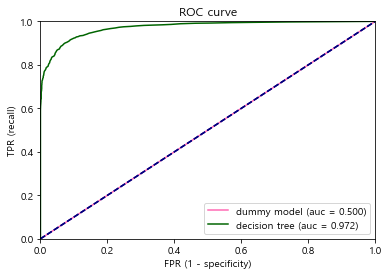

In [101]:
fpr_dummy, tpr_dummy, _ = roc_curve(Y[test_id], 
                                    dummy.predict_proba(X[test_id])[:,1])
plot_roc_curve(fpr_dummy, tpr_dummy, 'dummy model', 'hotpink')
fpr_tree, tpr_tree, _ = roc_curve(Y[test_id], 
                                  clf.predict_proba(X[test_id])[:,1])
plot_roc_curve(fpr_tree, tpr_tree, 'decision tree', 'darkgreen')

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(x, y)
#Use the values for your confusion matrix
knn_y_model = knn_model.predict(X)
# Use the probabilities for your ROC and Precision-recall curves
knn_y_proba = knn_model.predict_proba(X)

Text(0.5, 0, 'Predicted label')

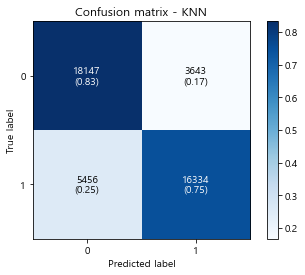

In [103]:
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(Y,knn_y_model),
                                show_absolute=True,show_normed=True,colorbar=True)
plt.title("Confusion matrix - KNN")
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 1.0, 'ROC Curves - K-Nearest Neighbors')

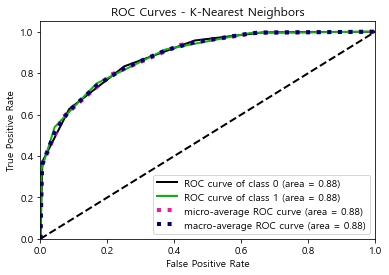

In [104]:
import scikitplot as skplt
plot = skplt.metrics.plot_roc(Y, knn_y_proba)
plt.title("ROC Curves - K-Nearest Neighbors")

In [105]:
nd = pd.read_csv("human_new.csv", encoding = 'cp949')
nd.head(2)

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국
0,H00001,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States
1,H00002,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States


In [106]:
nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   아이디     16281 non-null  object
 1   나이      16281 non-null  int64 
 2   노동 계급   15318 non-null  object
 3   fnlwgt  16281 non-null  int64 
 4   학력      16281 non-null  object
 5   교육 수    16281 non-null  int64 
 6   혼인 상태   16281 non-null  object
 7   직업      15315 non-null  object
 8   관계      16281 non-null  object
 9   인종      16281 non-null  object
 10  자본 이득   16281 non-null  int64 
 11  자본 손실   16281 non-null  int64 
 12  주당 시간   16281 non-null  int64 
 13  모국      16007 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.7+ MB


In [107]:
nd.isnull().sum()

아이디         0
나이          0
노동 계급     963
fnlwgt      0
학력          0
교육 수        0
혼인 상태       0
직업        966
관계          0
인종          0
자본 이득       0
자본 손실       0
주당 시간       0
모국        274
dtype: int64

In [108]:
nd.shape

(16281, 14)

In [109]:
nt = nd.copy()
nt.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국
0,H00001,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States
1,H00002,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States
2,H00003,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States
3,H00004,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States
4,H00005,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,0,0,30,United-States


In [110]:
nt['partner'] = np.where((nt['혼인 상태'].str.len() > 14), 'couple', 'single')
nt.tail()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,partner
16276,H16277,20,NaN,216672,Some-college,10,Never-married,NaN,Own-child,White,0,0,30,United-States,single
16277,H16278,25,Private,61956,Bachelors,13,Never-married,Exec-managerial,Own-child,White,4650,0,45,United-States,single
16278,H16279,33,Private,157216,Masters,14,Never-married,Sales,Not-in-family,White,0,0,40,United-States,single
16279,H16280,68,NaN,150250,Masters,14,Married-civ-spouse,NaN,Husband,White,0,1510,30,United-States,couple
16280,H16281,37,Private,112838,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,0,0,55,United-States,couple


In [111]:
nt['marital'] = np.where(((nt['관계'] == ' Husband') | (nt['관계'] == ' Own-child') | (nt['관계'] == ' Wife')), 'married', 'unmarried')
nt.tail()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,partner,marital
16276,H16277,20,NaN,216672,Some-college,10,Never-married,NaN,Own-child,White,0,0,30,United-States,single,married
16277,H16278,25,Private,61956,Bachelors,13,Never-married,Exec-managerial,Own-child,White,4650,0,45,United-States,single,married
16278,H16279,33,Private,157216,Masters,14,Never-married,Sales,Not-in-family,White,0,0,40,United-States,single,unmarried
16279,H16280,68,NaN,150250,Masters,14,Married-civ-spouse,NaN,Husband,White,0,1510,30,United-States,couple,married
16280,H16281,37,Private,112838,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,0,0,55,United-States,couple,married


In [112]:
nt['노동 강도'] = np.where((nt['주당 시간'] >= 40 ), 'hard-worker', 'non-hard-worker')
nt.tail()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,partner,marital,노동 강도
16276,H16277,20,NaN,216672,Some-college,10,Never-married,NaN,Own-child,White,0,0,30,United-States,single,married,non-hard-worker
16277,H16278,25,Private,61956,Bachelors,13,Never-married,Exec-managerial,Own-child,White,4650,0,45,United-States,single,married,hard-worker
16278,H16279,33,Private,157216,Masters,14,Never-married,Sales,Not-in-family,White,0,0,40,United-States,single,unmarried,hard-worker
16279,H16280,68,NaN,150250,Masters,14,Married-civ-spouse,NaN,Husband,White,0,1510,30,United-States,couple,married,non-hard-worker
16280,H16281,37,Private,112838,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,0,0,55,United-States,couple,married,hard-worker


In [113]:
nt.loc[nt['주당 시간'] <= 25, '노동 시간'] = 'part'
nt.loc[(nt['주당 시간'] > 25) & (nt['주당 시간'] <= 40), '노동 시간'] = 'full'
nt.loc[(nt['주당 시간'] > 40) & (nt['주당 시간'] <= 60), '노동 시간'] = 'over'
nt.loc[nt['주당 시간'] > 60, '노동 시간'] = 'too-much'
nt.tail()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,partner,marital,노동 강도,노동 시간
16276,H16277,20,NaN,216672,Some-college,10,Never-married,NaN,Own-child,White,0,0,30,United-States,single,married,non-hard-worker,full
16277,H16278,25,Private,61956,Bachelors,13,Never-married,Exec-managerial,Own-child,White,4650,0,45,United-States,single,married,hard-worker,over
16278,H16279,33,Private,157216,Masters,14,Never-married,Sales,Not-in-family,White,0,0,40,United-States,single,unmarried,hard-worker,full
16279,H16280,68,NaN,150250,Masters,14,Married-civ-spouse,NaN,Husband,White,0,1510,30,United-States,couple,married,non-hard-worker,full
16280,H16281,37,Private,112838,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,0,0,55,United-States,couple,married,hard-worker,over


In [114]:
nt.loc[nt['나이'] <= 25, '연령대'] = 'young'
nt.loc[(nt['나이'] > 25) & (nt['나이'] <= 45), '연령대'] = 'middle'
nt.loc[(nt['나이'] > 45) & (nt['나이'] <= 65), '연령대'] = 'senior'
nt.loc[nt['나이'] > 65, '연령대'] = 'old'
nt.tail()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,partner,marital,노동 강도,노동 시간,연령대
16276,H16277,20,NaN,216672,Some-college,10,Never-married,NaN,Own-child,White,0,0,30,United-States,single,married,non-hard-worker,full,young
16277,H16278,25,Private,61956,Bachelors,13,Never-married,Exec-managerial,Own-child,White,4650,0,45,United-States,single,married,hard-worker,over,young
16278,H16279,33,Private,157216,Masters,14,Never-married,Sales,Not-in-family,White,0,0,40,United-States,single,unmarried,hard-worker,full,middle
16279,H16280,68,NaN,150250,Masters,14,Married-civ-spouse,NaN,Husband,White,0,1510,30,United-States,couple,married,non-hard-worker,full,old
16280,H16281,37,Private,112838,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,0,0,55,United-States,couple,married,hard-worker,over,middle


In [115]:
nt.loc[(nt['학력'] == ' 11th') | (nt['학력'] == ' 10th') |
        (nt['학력'] == ' 7th-8th') | (nt['학력'] == ' 9th') |
        (nt['학력'] == ' 12th') | (nt['학력'] == ' 5th-6th') |
        (nt['학력'] == ' 1st-4th') | (nt['학력'] == ' Preschool'), '학군'] = 'low'

In [116]:
nt.loc[(nt['학력'] == ' Assoc-voc') | (nt['학력'] == ' Assoc-acdm') |
        (nt['학력'] == ' Prof-school') | (nt['학력'] == ' HS-grad') |
        (nt['학력'] == ' Some-college'), '학군']= 'ave'

In [117]:
nt.loc[(nt['학력'] == ' Bachelors') | (nt['학력'] == ' Masters') |
        (nt['학력'] == ' Doctorate'), '학군']= 'high'
nt.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,partner,marital,노동 강도,노동 시간,연령대,학군
0,H00001,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States,single,married,hard-worker,full,young,low
1,H00002,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States,couple,married,hard-worker,over,middle,ave
2,H00003,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,couple,married,hard-worker,full,middle,ave
3,H00004,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States,couple,married,hard-worker,full,middle,ave
4,H00005,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,0,0,30,United-States,single,married,non-hard-worker,full,young,ave


In [118]:
nt['직업'] = nt['직업'].fillna('Unknown')

In [119]:
nt_관계 = pd.get_dummies(nt['관계'])
nt_관계.head()

,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0,0,0,1,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,1,0,0


In [120]:
ntt = pd.concat([nt, nt_관계], axis=1)
ntt.head().T

,0,1,2,3,4
아이디,H00001,H00002,H00003,H00004,H00005
나이,25,38,28,44,18
노동 계급,Private,Private,Local-gov,Private,NaN
fnlwgt,226802,89814,336951,160323,103497
학력,11th,HS-grad,Assoc-acdm,Some-college,Some-college
교육 수,7,9,12,10,10
혼인 상태,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married
직업,Machine-op-inspct,Farming-fishing,Protective-serv,Machine-op-inspct,Unknown
관계,Own-child,Husband,Husband,Husband,Own-child
인종,Black,White,White,Black,White


In [121]:
nt_인종 = pd.get_dummies(nt['인종'])
nt_인종.head()

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,0,0,1


In [122]:
nnt = pd.concat([ntt, nt_인종], axis=1)
nnt.head().T

,0,1,2,3,4
아이디,H00001,H00002,H00003,H00004,H00005
나이,25,38,28,44,18
노동 계급,Private,Private,Local-gov,Private,NaN
fnlwgt,226802,89814,336951,160323,103497
학력,11th,HS-grad,Assoc-acdm,Some-college,Some-college
교육 수,7,9,12,10,10
혼인 상태,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married
직업,Machine-op-inspct,Farming-fishing,Protective-serv,Machine-op-inspct,Unknown
관계,Own-child,Husband,Husband,Husband,Own-child
인종,Black,White,White,Black,White


In [123]:
nt_직업 = pd.get_dummies(nt['직업'])
n = pd.concat([nnt, nt_직업], axis=1)
n.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Unknown
0,H00001,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,...,0,1,0,0,0,0,0,0,0,0
1,H00002,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,...,0,0,0,0,0,0,0,0,0,0
2,H00003,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,...,0,0,0,0,0,1,0,0,0,0
3,H00004,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,...,0,1,0,0,0,0,0,0,0,0
4,H00005,18,NaN,103497,Some-college,10,Never-married,Unknown,Own-child,White,...,0,0,0,0,0,0,0,0,0,1


In [124]:
n.shape

(16281, 46)

In [125]:
n.isnull().sum()

아이디                      0
나이                       0
노동 계급                  963
fnlwgt                   0
학력                       0
교육 수                     0
혼인 상태                    0
직업                       0
관계                       0
인종                       0
자본 이득                    0
자본 손실                    0
주당 시간                    0
모국                     274
partner                  0
marital                  0
노동 강도                    0
노동 시간                    0
연령대                      0
학군                       0
 Husband                 0
 Not-in-family           0
 Other-relative          0
 Own-child               0
 Unmarried               0
 Wife                    0
 Amer-Indian-Eskimo      0
 Asian-Pac-Islander      0
 Black                   0
 Other                   0
 White                   0
 Adm-clerical            0
 Armed-Forces            0
 Craft-repair            0
 Exec-managerial         0
 Farming-fishing         0
 Handlers-cleaners       0
 

In [126]:
n['노동 계급'] = n['노동 계급'].fillna('Unknown')

In [127]:
con = ['모국']

In [128]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
df[con] = imputer.fit_transform(df[con])
df[con].head()

,모국
0,38
1,38
2,38
3,38
4,4


In [129]:
df.isnull().sum()

나이                     0
노동 계급                  0
fnlwgt                 0
학력                     0
교육 수                   0
혼인 상태                  0
직업                     0
관계                     0
인종                     0
성별                     0
자본 이득                  0
자본 손실                  0
주당 시간                  0
모국                     0
partner                0
marital                0
노동 강도                  0
노동 시간                  0
연령대                    0
학군                     0
 Husband               0
 Not-in-family         0
 Other-relative        0
 Own-child             0
 Unmarried             0
 Wife                  0
 Amer-Indian-Eskimo    0
 Asian-Pac-Islander    0
 Black                 0
 Other                 0
 White                 0
 Adm-clerical          0
 Armed-Forces          0
 Craft-repair          0
 Exec-managerial       0
 Farming-fishing       0
 Handlers-cleaners     0
 Machine-op-inspct     0
 Other-service         0
 Priv-house-serv       0


In [130]:
n.dtypes

아이디                    object
나이                      int64
노동 계급                  object
fnlwgt                  int64
학력                     object
교육 수                    int64
혼인 상태                  object
직업                     object
관계                     object
인종                     object
자본 이득                   int64
자본 손실                   int64
주당 시간                   int64
모국                     object
partner                object
marital                object
노동 강도                  object
노동 시간                  object
연령대                    object
학군                     object
 Husband                uint8
 Not-in-family          uint8
 Other-relative         uint8
 Own-child              uint8
 Unmarried              uint8
 Wife                   uint8
 Amer-Indian-Eskimo     uint8
 Asian-Pac-Islander     uint8
 Black                  uint8
 Other                  uint8
 White                  uint8
 Adm-clerical           uint8
 Armed-Forces           uint8
 Craft-rep

In [131]:
cat = ['노동 계급', '학력', '혼인 상태', '직업', '관계', '인종', '모국', 'marital', '노동 강도', 'partner', '노동 시간', '연령대', '학군']
obj = ['노동 계급', '학력', '혼인 상태', '직업', '관계', '인종', '모국', 'marital', '노동 강도', 'partner', '노동 시간', '연령대', '학군']

In [132]:
n[obj] = n[obj].apply(lambda x: x.astype('category').cat.codes)

In [133]:
n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   아이디                  16281 non-null  object
 1   나이                   16281 non-null  int64 
 2   노동 계급                16281 non-null  int8  
 3   fnlwgt               16281 non-null  int64 
 4   학력                   16281 non-null  int8  
 5   교육 수                 16281 non-null  int64 
 6   혼인 상태                16281 non-null  int8  
 7   직업                   16281 non-null  int8  
 8   관계                   16281 non-null  int8  
 9   인종                   16281 non-null  int8  
 10  자본 이득                16281 non-null  int64 
 11  자본 손실                16281 non-null  int64 
 12  주당 시간                16281 non-null  int64 
 13  모국                   16281 non-null  int8  
 14  partner              16281 non-null  int8  
 15  marital              16281 non-null  int8  
 16  노동 강

In [134]:
n.shape

(16281, 46)

In [135]:
dtest_ndf = xgb.DMatrix(data=n.iloc[:, 1:])

In [136]:
n['성별'] = xgb_model.predict(dtest_ndf)
n.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,...,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Unknown,성별
0,H00001,25,3,226802,1,7,4,6,3,2,...,1,0,0,0,0,0,0,0,0,0.614205
1,H00002,38,3,89814,11,9,2,4,0,4,...,0,0,0,0,0,0,0,0,0,0.999937
2,H00003,28,1,336951,7,12,2,10,0,4,...,0,0,0,0,1,0,0,0,0,0.999862
3,H00004,44,3,160323,15,10,2,6,0,2,...,1,0,0,0,0,0,0,0,0,0.999924
4,H00005,18,8,103497,15,10,4,14,3,4,...,0,0,0,0,0,0,0,0,1,0.373925


In [137]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.096 0.497 0.999 1.    0.988 0.55  0.378 0.269 0.071 0.305]


In [138]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [139]:
get_clf_eval(y_test, preds)

오차행렬
[[2175  526]
 [ 736 4704]]
정확도: 0.8450, 정밀도: 0.8994, 재현율: 0.8647


In [140]:
XX.columns

Index(['나이', '노동 계급', 'fnlwgt', '학력', '교육 수', '혼인 상태', '직업', '관계', '인종',
       '자본 이득', '자본 손실', '주당 시간', '모국', 'partner', 'marital', '노동 강도', '노동 시간',
       '연령대', '학군', ' Husband', ' Not-in-family', ' Other-relative',
       ' Own-child', ' Unmarried', ' Wife', ' Amer-Indian-Eskimo',
       ' Asian-Pac-Islander', ' Black', ' Other', ' White', ' Adm-clerical',
       ' Armed-Forces', ' Craft-repair', ' Exec-managerial',
       ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct',
       ' Other-service', ' Priv-house-serv', ' Prof-specialty',
       ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving',
       'Unknown'],
      dtype='object')

In [141]:
col = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'aa', 'bb', 'cc', 'dd', 'ee', 'ff', 'gg', 'hh', 'ii', 'jj', 'kk', 'll', 'mm', 'nn', 'oo', 'pp', 'qq', 'rr', 'ss']

In [142]:
XX.head()

,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Unknown
0,59,3,61885,2,8,0,13,2,2,0,...,0,0,0,0,0,0,0,0,1,0
1,71,3,180733,12,14,4,7,1,4,0,...,0,0,1,0,0,0,0,0,0,0
2,42,3,107762,12,14,2,9,0,4,0,...,0,0,0,0,1,0,0,0,0,0
3,26,3,35917,11,9,2,11,0,4,0,...,0,0,0,0,0,0,1,0,0,0
4,46,3,256522,3,2,4,6,3,4,0,...,0,1,0,0,0,0,0,0,0,0


In [143]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(nestimators=400)
evals = [(X_test, y_test)]
lgbm_wrapper.fit(XX, yy, feature_name=col, early_stopping_rounds=100, 
                 eval_metric="logloss", eval_set=evals, verbose=True)
pred = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.638004	valid_0's binary_logloss: 0.638004
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.593153	valid_0's binary_logloss: 0.593153
[3]	valid_0's binary_logloss: 0.555866	valid_0's binary_logloss: 0.555866
[4]	valid_0's binary_logloss: 0.524585	valid_0's binary_logloss: 0.524585
[5]	valid_0's binary_logloss: 0.497917	valid_0's binary_logloss: 0.497917
[6]	valid_0's binary_logloss: 0.474965	valid_0's binary_logloss: 0.474965
[7]	valid_0's binary_logloss: 0.455762	valid_0's binary_logloss: 0.455762
[8]	valid_0's binary_logloss: 0.438452	valid_0's binary_logloss: 0.438452
[9]	valid_0's binary_logloss: 0.423092	valid_0's binary_logloss: 0.423092
[10]	valid_0's binary_logloss: 0.409363	valid_0's binary_logloss: 0.409363
[11]	valid_0's binary_logloss: 0.39807	valid_0's binary_logloss: 0.39807
[12]	valid_0's binary_logloss: 0.388077	valid_0's binary_logloss: 0.388077
[13]	valid_0's binary_logloss: 0.378994	valid_0'

In [144]:
get_clf_eval(y_test, preds)

오차행렬
[[2175  526]
 [ 736 4704]]
정확도: 0.8450, 정밀도: 0.8994, 재현율: 0.8647


In [145]:
n['성별'].value_counts()

0.999882    11
0.999948    11
0.999960    11
0.999917    10
0.999900    10
            ..
0.240598     1
0.947520     1
0.931895     1
0.644721     1
0.546875     1
Name: 성별, Length: 12476, dtype: int64

In [146]:
str = ['아이디','성별']
n[str].head()

,아이디,성별
0,H00001,0.614205
1,H00002,0.999937
2,H00003,0.999862
3,H00004,0.999924
4,H00005,0.373925


In [147]:
n_rename = n.rename(columns={'아이디':'ID', '성별':'SEX'})
n_rename.head()

,ID,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,...,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Unknown,SEX
0,H00001,25,3,226802,1,7,4,6,3,2,...,1,0,0,0,0,0,0,0,0,0.614205
1,H00002,38,3,89814,11,9,2,4,0,4,...,0,0,0,0,0,0,0,0,0,0.999937
2,H00003,28,1,336951,7,12,2,10,0,4,...,0,0,0,0,1,0,0,0,0,0.999862
3,H00004,44,3,160323,15,10,2,6,0,2,...,1,0,0,0,0,0,0,0,0,0.999924
4,H00005,18,8,103497,15,10,4,14,3,4,...,0,0,0,0,0,0,0,0,1,0.373925


In [148]:
str = ['ID','SEX']
n_rename[str].head()

,ID,SEX
0,H00001,0.614205
1,H00002,0.999937
2,H00003,0.999862
3,H00004,0.999924
4,H00005,0.373925


In [149]:
n_rename[str].to_csv('submission_human.csv', encoding='cp949', index=False)

In [150]:
n_rename.shape

(16281, 47)